# TP 2 - Big Data

## Parte I

In [1]:
#Instalamos e importamos pandas para abrir la base de datos
import sys
!{sys.executable} -m pip install pandas
import pandas as pd 

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\frozendict-2.3.0-py3.10.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Verificamos directorio
import os
print(os.getcwd())

C:\Users\manue\OneDrive\Escritorio\UdeSA\Materias\Quinto Año\Semestre de Primavera\Big Data\BigData_Trabajos_Practicos\TP2


In [3]:
#Abrimos la base de datos y la guardamos en un data frame
EPH_2023_1=pd.read_excel("usu_individual_T123.xlsx")

In [4]:
#Visualizamos la base de datos para comprender su estructura
EPH_2023_1

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.00,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.00,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48633,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,S,10,528,...,NaN,7,66666.67,5,5.0,6,5.0,NaN,6,793
48634,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48635,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48636,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714


#### Ejercicio 2
#### Inciso (a)

In [5]:
#Eliminamos filas pertenecientes a hogares que no son de GBA o CABA
#CABA = 32
#GBA = 33
EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[(EPH_2023_1["AGLOMERADO"] != 32) & (EPH_2023_1["AGLOMERADO"] != 33)].index)

#### Inciso (b)

In [6]:
#Eliminamos filas con valores sin sentido

#Eliminamos valores de EDADES (CH06) menores que 0
EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["CH06"] < 0].index)

#Eliminamos valores de TIPO DE UNION (CH07) igual a 9 
EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["CH07"] == 9].index)

#Eliminamos valores de INGRESOS (P47T) menores que 0
EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["P47T"] < 0].index)

#Eliminamos valores de INGRESOS TOTALES FAMILIARES(ITF) menores que 0
EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["ITF"] < 0].index)

#Eliminaríamos valores de HORAS TRABAJADAS (PP3E_TOT) mayores que 126. 
#Trabajar más de 126 horas semanales implica trabajar más de 18 diarias
#EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["PP3E_TOT"] == 999].index)
#EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["PP3E_TOT"] == 168].index)
#EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["PP3E_TOT"] == 147].index)

#Eliminaríamos valores de DECILES (DECCFR) mayores que 10. 
#EPH_2023_1 = EPH_2023_1.drop(EPH_2023_1[EPH_2023_1["DECCFR"] > 10].index)

#### Inciso (c)

In [7]:
#Importamos Matplotlib
import matplotlib.pyplot as plt

In [8]:
#Visualizamos la columna de sexo
EPH_2023_1["CH04"]

102      2
103      1
104      1
105      2
106      2
        ..
48595    2
48596    1
48597    2
48598    2
48599    1
Name: CH04, Length: 5982, dtype: int64

In [9]:
# Contamos la cantidad de mujeres y varones
cant_mujeresyhombres = EPH_2023_1['CH04'].value_counts()
cant_mujeres = (EPH_2023_1['CH04']==2).sum()
cant_hombres = (EPH_2023_1['CH04']==1).sum()

#Calculamos las proporciones correspondientes a cada uno
prop_mujeres = cant_mujeres/len(EPH_2023_1['CH04'])
prop_hombres = cant_hombres/len(EPH_2023_1['CH04'])

#Imprimimos los resultados
print("Cantidad de mujeres ", cant_mujeres, " | Proporción", prop_mujeres)
print("Cantidad de hombres ", cant_hombres, " | Proporción", prop_hombres)


Cantidad de mujeres  3181  | Proporción 0.5317619525242394
Cantidad de hombres  2801  | Proporción 0.4682380474757606


Text(0, 0.5, 'Cantidad')

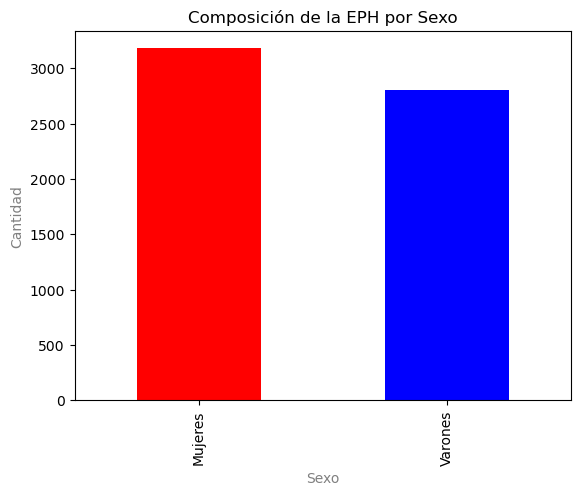

In [10]:
# Creamos un gráfico de barras
graph_1c = cant_mujeresyhombres.plot(kind='bar', title='Composición de la EPH por Sexo', color=['red', 'blue'])
graph_1c.set_xlabel("Sexo", color='grey')
graph_1c.set_xticklabels(["Mujeres", "Varones"])
graph_1c.set_ylabel("Cantidad", color='grey')

 #### Inciso (d)

In [11]:
#Calculamos las correlaciones
corr = EPH_2023_1[["CH04", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]].corr()
corr

,CH04,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF
CH04,1.000000,-0.024754,-0.012754,0.040673,0.089123,0.063043,-0.042993
CH07,-0.024754,1.000000,0.074549,-0.076107,0.458299,0.436574,-0.093218
CH08,-0.012754,0.074549,1.000000,0.013886,0.044102,0.108551,-0.085941
NIVEL_ED,0.040673,-0.076107,0.013886,1.000000,-0.187496,-0.004095,0.202981
ESTADO,0.089123,0.458299,0.044102,-0.187496,1.000000,0.812805,-0.230763
CAT_INAC,0.063043,0.436574,0.108551,-0.004095,0.812805,1.000000,-0.223025
IPCF,-0.042993,-0.093218,-0.085941,0.202981,-0.230763,-0.223025,1.000000


In [12]:
#Importamos la librería seaborn
import seaborn as sns

<Axes: >

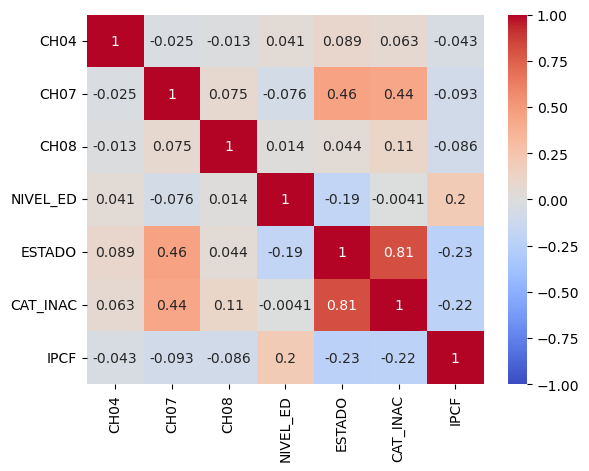

In [13]:
#Creamos el mapa de calor
sns.heatmap(corr, vmin=-1, vmax=+1, annot=True, cmap="coolwarm")


#### Inciso (e)

In [14]:
# Partiendo del data frame anterior, agrupamos por estado (muesta ocupación, desempleo, etc.) y calculamos la cantidad en cada uno y el ingreso medio por grupo
ESTADO_IPCF = EPH_2023_1.groupby(by=["ESTADO"]).agg({"ESTADO":"count","IPCF":"mean"})

# Los resultados que obtenemos son
ESTADO_IPCF

,ESTADO,IPCF
ESTADO,,
0,24,0.000000
1,2254,93122.616411
2,264,27664.024053
3,2539,44748.879401
4,901,33758.999634


In [15]:
#Calculamos las proporciones correspondientes a cada uno
cant_DESOCUPADOS = (EPH_2023_1['ESTADO']==2).sum()
cant_INACTIVOS = (EPH_2023_1['ESTADO']==3).sum()
prop_DESOCUPADOS = cant_DESOCUPADOS/len(EPH_2023_1['ESTADO'])
prop_INACTIVOS= cant_INACTIVOS/len(EPH_2023_1['ESTADO'])

print(prop_DESOCUPADOS)
print(prop_INACTIVOS)

0.044132397191574725
0.4244399866265463


#### Inciso (f)

In [16]:
#Creamos una nueva columna donde agregamos un string de texto que contenga las comibinación de sexo y edad
EPH_2023_1["sexo_edad"] = EPH_2023_1["CH04"].astype(str) + "_" + EPH_2023_1["CH06"].astype(str)


In [17]:
EPH_2023_1

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,4,67500.00,5,NaN,5,5.0,NaN,6,2540,2_65
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,4,67500.00,5,NaN,5,5.0,NaN,6,2540,1_70
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,23333.33,1,NaN,1,1.0,NaN,1,14082,1_36
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,23333.33,1,NaN,1,1.0,NaN,1,14082,2_28
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,23333.33,1,NaN,1,1.0,NaN,1,14082,2_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48595,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,10,160000.00,9,NaN,9,9.0,NaN,9,2295,2_38
48596,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,10,160000.00,9,NaN,9,9.0,NaN,9,2295,1_9
48597,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,8,254000.00,10,NaN,10,10.0,NaN,10,1516,2_77
48598,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,12,0.00,12,NaN,12,12.0,NaN,12,0,2_45


In [18]:
#Creamos las variables sexo y edad que pueden tomar cada uno de los valores posibles y 
#luego generamos todas las combinaciones posibles de sexo-edad
sexo = pd.Series([1, 2])
edad = pd.Series(range(104))
sexo_edad=[]
for i in sexo:
    for j in edad:
        sexo_edad.append(f"{i}_{j}")
sexo_edad

#Creamos un dataframe llamado Valores que tendrá las combinaciones posibles de sexo-edad
Valores=pd.DataFrame({'sexo_edad':sexo_edad})

#Creamos un vector con los valores de equivalencias respetando el orden del diccionario anterior
adulto_equiv= [0.35,	 0.37,	 0.46,	 0.51,	 0.55,	 0.6,	 0.64,	 0.66,	 0.68,	 
              0.69,	 0.79,	 0.82,	 0.85,	 0.9,	 0.96,	 1.0,	 1.03,	 1.04,	 
              1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 
              1.02,	 1.02,	 1.02,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.35,	 0.37,	 0.46,	 0.51,	 
              0.55,	 0.60,	 0.64,	 0.66,	 0.68,	 0.69,	 0.70,	 0.72,	 0.74,	 
              0.76,	 0.76,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63]

#Agregamos a nuestro dataframe dichas equivalencias
Valores["adulto_equiv"]=adulto_equiv


In [19]:
#Visualizamos nuestro data frame con las equivalencias por sexo-edad
Valores

,sexo_edad,adulto_equiv
0,1_0,0.35
1,1_1,0.37
2,1_2,0.46
3,1_3,0.51
4,1_4,0.55
...,...,...
203,2_99,0.63
204,2_100,0.63
205,2_101,0.63
206,2_102,0.63


In [20]:
#Agregamos nuestro dataframe valores a la EPH, uniendolas por el valor común sexo_edad y agregando así la variable adulto_equiv
EPH_2023_1_Extendida=EPH_2023_1.merge(Valores, how="left")

In [21]:
#Visualizamos como quedó extendida nuestra base de datos
EPH_2023_1_Extendida

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,67500.00,5,NaN,5,5.0,NaN,6,2540,2_65,0.67
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,67500.00,5,NaN,5,5.0,NaN,6,2540,1_70,0.83
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,23333.33,1,NaN,1,1.0,NaN,1,14082,1_36,1.10
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,23333.33,1,NaN,1,1.0,NaN,1,14082,2_28,0.76
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,23333.33,1,NaN,1,1.0,NaN,1,14082,2_9,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,160000.00,9,NaN,9,9.0,NaN,9,2295,2_38,0.77
5978,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,160000.00,9,NaN,9,9.0,NaN,9,2295,1_9,0.69
5979,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,254000.00,10,NaN,10,10.0,NaN,10,1516,2_77,0.63
5980,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,0.00,12,NaN,12,12.0,NaN,12,0,2_45,0.77


In [22]:
#A continuación sumamos el valor de equivalencia sexo-edad para cada uno de los hogares y lo almacenamos en una nueva variable que llamamos ad_equiv_hogar
ad_equiv_hogar = EPH_2023_1_Extendida.groupby(by="CODUSU").agg({"adulto_equiv":"sum"}).reset_index()
ad_equiv_hogar = ad_equiv_hogar.rename(columns={"adulto_equiv": "ad_equiv_hogar"})


In [23]:
#Visualizamos el resultado de esta nueva variable
ad_equiv_hogar

,CODUSU,ad_equiv_hogar
0,TQRMNOPPQHJNOPCDEIJAH00802435,3.64
1,TQRMNOPPQHKMQRCDEIJAH00780809,4.58
2,TQRMNOPPQHLNKTCDEIIAD00780107,2.24
3,TQRMNOPPQHLOKTCDEIJAH00719666,1.10
4,TQRMNOPPQHMKLSCDEIIAD00801791,1.41
...,...,...
2415,TQTMNORQXHMOSQCDEIJAH00802270,3.23
2416,TQTMNORTQHLMNUCDEIJAH00793701,3.68
2417,TQUMNOQQUHKNRUCDEIJAH00780938,2.07
2418,TQUMNOQTRHKMPSCDEIJAH00801913,2.17


In [24]:
#Nuevamente, agregamos esta nueva variable al dataframe anterior combinando por numero de hogar
EPH_TP2 = EPH_2023_1_Extendida.merge(ad_equiv_hogar, how="left")

In [25]:
#Visualizamos nuestra base de datos final
EPH_TP2

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,2_65,0.67,1.50
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,1_70,0.83,1.50
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,1_36,1.10,2.55
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,2_28,0.76,2.55
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,2_9,0.69,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,9,NaN,9,9.0,NaN,9,2295,2_38,0.77,2.56
5978,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,9,NaN,9,9.0,NaN,9,2295,1_9,0.69,2.56
5979,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,10,NaN,10,10.0,NaN,10,1516,2_77,0.63,0.63
5980,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,12,NaN,12,12.0,NaN,12,0,2_45,0.77,1.81


#### Ejercicio 3

In [26]:
#Creamos un nuevo dataframe que contiene a todos aquellos que respondieron la pregunta respecto a sus ingresos totales
respondieron= EPH_TP2[EPH_TP2["ITF"]!=0]

#Calculamos la cantidad de observaciones que cumplen con este requisito
print(len(respondieron))

4180


In [27]:
#Para controlar verificamos el valor mínimo del detaframe y observamos que es mayor a cero
respondieron['ITF'].min()

2500

In [28]:
#Creamos un nuevo dataframe con aquellos que nos respondieron sobre sus ingresos totales
norespondieron= EPH_TP2[EPH_TP2["ITF"]==0]

#Imprimimos la cantidad de observaciones para controlar cuántas corresponden a este grupo
print(len(norespondieron))

1802


In [29]:
#Nuevamente, como control, calculamos la suma de ingresos totales y verificamos que no sea distinta de cero
norespondieron['ITF'].sum()

0

In [30]:
#Calculamos las proporciones de norespondieron sobre el total
cant_norespondieron = len(norespondieron)
prop_norespondieron = cant_norespondieron/(len(norespondieron)+len(respondieron))

print(prop_norespondieron)


0.30123704446673355


#### Ejercicio 4

In [31]:
#Calculamos el ingreso necesario para no ser pobre por hogar multiplicando la cantidad de ingreso por persona necesario por la el equivalente de personas según sexo y edad
respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]

C:\Users\manue\AppData\Local\Temp\ipykernel_12964\1615974012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]


In [32]:
#Visualizamos el resultado obtenido
respondieron

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,5,5.0,NaN,6,2540,2_65,0.67,1.50,86056.5750
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,5,5.0,NaN,6,2540,1_70,0.83,1.50,86056.5750
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,1_36,1.10,2.55,146296.1775
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,2_28,0.76,2.55,146296.1775
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,2_9,0.69,2.55,146296.1775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,TQRMNORTWHJMSTCDEIJAH00793919,2023,1,1,5,0,1,S,33,3232,...,NaN,2,2.0,NaN,2,4220,1_5,0.60,3.92,224894.5160
5976,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,1,1,1,S,33,1236,...,NaN,9,9.0,NaN,9,2295,1_32,1.10,2.56,146869.8880
5977,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,NaN,9,9.0,NaN,9,2295,2_38,0.77,2.56,146869.8880
5978,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,NaN,9,9.0,NaN,9,2295,1_9,0.69,2.56,146869.8880


#### Ejercicio 5

In [33]:
#Creamos una función que clasifique a pobres en función a la  relación entre ingreso total reportado y el necesario
def clasificar_pobreza(row):
    if row["ITF"] < row["ingreso_necesario"]:
        pobre = 1
    else:
        pobre = 0
    return pobre

In [34]:
#Aplicamos la función a nuestro dataframe y visualizamos los resultados
respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)
respondieron

C:\Users\manue\AppData\Local\Temp\ipykernel_12964\1156415633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,NaN,6,2540,2_65,0.67,1.50,86056.5750,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,NaN,6,2540,1_70,0.83,1.50,86056.5750,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1,1.0,NaN,1,14082,1_36,1.10,2.55,146296.1775,1
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1,1.0,NaN,1,14082,2_28,0.76,2.55,146296.1775,1
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1,1.0,NaN,1,14082,2_9,0.69,2.55,146296.1775,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,TQRMNORTWHJMSTCDEIJAH00793919,2023,1,1,5,0,1,S,33,3232,...,2,2.0,NaN,2,4220,1_5,0.60,3.92,224894.5160,1
5976,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,1,1,1,S,33,1236,...,9,9.0,NaN,9,2295,1_32,1.10,2.56,146869.8880,0
5977,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,9,9.0,NaN,9,2295,2_38,0.77,2.56,146869.8880,0
5978,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,9,9.0,NaN,9,2295,1_9,0.69,2.56,146869.8880,0


In [35]:
#Visualizamos las columnas de ingresos totales, necesarios y clasificación para observar los resultados de forma más clara
respondieron[["ITF","ingreso_necesario", "pobre"]]

,ITF,ingreso_necesario,pobre
0,135000,86056.5750,0
1,135000,86056.5750,0
2,70000,146296.1775,1
3,70000,146296.1775,1
4,70000,146296.1775,1
...,...,...,...
5975,155000,224894.5160,1
5976,480000,146869.8880,0
5977,480000,146869.8880,0
5978,480000,146869.8880,0


In [36]:
#Calculamos la cantidad de pobres
pobres = (respondieron['pobre'] == 1).sum()
print(pobres)

prop_pobres=pobres/len(respondieron)
print(prop_pobres)

1614
0.3861244019138756


## Parte II: Clasificación

#### Ejercicio 1

In [37]:
#Eliminamos variables de "Ingresos de la ocupacion principal de los asalariados"
respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True)
norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True)

#Eliminamos variables de "Ingresos de la ocupacion principal"
respondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True)
norespondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True)

#Eliminamos variables de "Ingresos de otras ocupaciones"
respondieron.drop(["TOT_P12"], axis=1, inplace = True)
norespondieron.drop(["TOT_P12"], axis=1, inplace = True)

#Eliminamos variables de "Ingreso total individual"
respondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True)
norespondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True)

#Eliminamos variables de "Ingresos no laborales"
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True)
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True)

#Eliminamos variables de "Ingreso total familiar"
respondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True)
norespondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True)

#Eliminamos variables de "Ingreso per cápita familiar"
respondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True)
norespondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True)

#Eliminamos las columnas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True)
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True)

C:\Users\manue\AppData\Local\Temp\ipykernel_12964\3093388525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True)
C:\Users\manue\AppData\Local\Temp\ipykernel_12964\3093388525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True)
C:\Users\manue\AppData\Local\Temp\ipykernel_12964\3093388525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

#### Ejercicio 2

In [38]:
#Importamos un conjunto de paquetes necesarios para el cálculo de los diferentes modelos
import numpy as np
import sklearn
import statsmodels.api as sm

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#Para chequear la correlacion entre variables
corr2 = EPH_2023_1[["ANO4","TRIMESTRE","NRO_HOGAR","COMPONENTE","H15","REGION","AGLOMERADO","PONDERA",
"CH03","CH04","CH06","CH07","CH08","CH09","CH10","CH11","CH12","CH13","CH15","CH16","NIVEL_ED","ESTADO","CAT_OCUP",
"CAT_INAC", "PP02C2","PP02E","PP02H","sexo_edad","PP02C1","PP02C3","PP02C4","PP02C5","PP02C6", "PP02C7","PP02C8","PP02I"]].corr()
corr2

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,PP02H,sexo_edad,PP02C1,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02I
ANO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIMESTRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NRO_HOGAR,NaN,NaN,1.000000,-0.025224,0.004404,NaN,-0.045840,-0.005452,-0.022825,0.020207,...,-0.025938,0.017685,-0.007292,-0.007245,-0.007467,-0.007387,-0.006951,-0.007429,-0.007483,-0.026056
COMPONENTE,NaN,NaN,-0.025224,1.000000,-0.465607,NaN,0.122547,0.129387,0.588422,0.002128,...,0.060652,-0.466854,-0.006860,-0.001934,-0.004771,-0.005016,-0.000386,-0.003598,-0.003546,0.061930
H15,NaN,NaN,0.004404,-0.465607,1.000000,NaN,-0.035743,-0.132097,-0.271302,0.023280,...,0.344038,0.757984,0.082661,0.082302,0.084044,0.083403,0.080267,0.083743,0.084174,0.343805
REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGLOMERADO,NaN,NaN,-0.045840,0.122547,-0.035743,NaN,1.000000,0.153404,0.065133,-0.010004,...,0.055616,-0.048172,0.016110,0.016409,0.016471,0.015549,0.013756,0.017141,0.017057,0.056857
PONDERA,NaN,NaN,-0.005452,0.129387,-0.132097,NaN,0.153404,1.000000,0.067081,-0.035198,...,-0.050222,-0.144940,-0.017762,-0.016633,-0.015543,-0.013704,-0.010058,-0.014685,-0.014651,-0.049832
CH03,NaN,NaN,-0.022825,0.588422,-0.271302,NaN,0.065133,0.067081,1.000000,0.003382,...,0.098518,-0.283675,0.028379,0.028813,0.028398,0.027568,0.025157,0.028730,0.027910,0.099139
CH04,NaN,NaN,0.020207,0.002128,0.023280,NaN,-0.010004,-0.035198,0.003382,1.000000,...,0.136614,0.570861,-0.017519,-0.016182,-0.017935,-0.017510,-0.011710,-0.020058,-0.019189,0.135539


In [40]:
#Primero realizamos una limpieza eliminando solamente las variables vinculadas a ingresos
Xopc1 = respondieron.drop(["pobre", "CODUSU", "IMPUTA", "CH16_COD", "CH15_COD","MAS_500", "CH05", "PP09A_ESP", "PP11M",
                        "PP11N", "PP11O", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T", "PP11B2_DIA", "PP11C", "PP11C99", 
                        "PP11D_COD", "PP11G_ANO", "PP11G_MES", "PP11G_DIA", "PP11L", "PP11L1", "PP10A", "PP10C", "PP10D",
                        "PP10E", "PP11A", "PP11B_COD", "PP11B1", "PP11B2_MES", "PP11B2_ANO", "PP09C_ESP",
                       "PP07G4", "PP07G_59", "PP07H","PP07I","PP07J","PP07K","PP09A","PP09B","PP09C",
                       "PP07E", "PP07F1", "PP07F2", "PP07F3", "PP07F4","PP07F5","PP07G1","PP07G2","PP07G3",
                       "PP05H","PP06A","PP06C","PP06D","PP06E","PP06H","PP07A","PP07C","PP07D",
                       "PP04G","PP05B2_MES","PP05B2_ANO","PP05B2_DIA","PP05C_1","PP05C_2","PP05C_3","PP05E","PP05F",
                       "PP04B_COD","PP04B1","PP04B2","PP04B3_MES","PP04B3_ANO","PP04B3_DIA","PP04C","PP04C99","PP04D_COD",
                       "PP03D","PP3E_TOT","PP3F_TOT","PP03G","PP03H","PP03I","PP03J","INTENSI","PP04A","PP03C", "CH14"], axis=1)

In [41]:
#Visualizamos el resultado obtenido
Xopc1

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,sexo_edad
0,2023,1,1,1,1,1,33,1545,1,2,...,0,0,0,0,0,0,0,2,2,2_65
1,2023,1,1,2,1,1,33,1545,2,1,...,0,0,0,0,0,0,0,0,0,1_70
2,2023,1,1,1,1,1,33,8423,1,1,...,0,0,0,0,0,0,0,0,0,1_36
3,2023,1,1,2,1,1,33,8423,2,2,...,0,0,0,0,0,0,0,0,0,2_28
4,2023,1,1,3,0,1,33,8423,3,2,...,0,0,0,0,0,0,0,0,0,2_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2023,1,1,5,0,1,33,3232,3,1,...,0,0,0,0,0,0,0,0,0,1_5
5976,2023,1,1,1,1,1,33,1236,1,1,...,0,0,0,0,0,0,0,0,0,1_32
5977,2023,1,1,2,1,1,33,1236,2,2,...,0,0,0,0,0,0,0,0,0,2_38
5978,2023,1,1,3,0,1,33,1236,3,1,...,0,0,0,0,0,0,0,0,0,1_9


In [42]:
#Eliminamos las observaciones que tengan algún missing
Xopc1bis = Xopc1.dropna() 

In [43]:
#Visualizamos la base de datos remanente
Xopc1bis

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,sexo_edad
0,2023,1,1,1,1,1,33,1545,1,2,...,0,0,0,0,0,0,0,2,2,2_65
1,2023,1,1,2,1,1,33,1545,2,1,...,0,0,0,0,0,0,0,0,0,1_70
2,2023,1,1,1,1,1,33,8423,1,1,...,0,0,0,0,0,0,0,0,0,1_36
3,2023,1,1,2,1,1,33,8423,2,2,...,0,0,0,0,0,0,0,0,0,2_28
4,2023,1,1,3,0,1,33,8423,3,2,...,0,0,0,0,0,0,0,0,0,2_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2023,1,1,5,0,1,33,3232,3,1,...,0,0,0,0,0,0,0,0,0,1_5
5976,2023,1,1,1,1,1,33,1236,1,1,...,0,0,0,0,0,0,0,0,0,1_32
5977,2023,1,1,2,1,1,33,1236,2,2,...,0,0,0,0,0,0,0,0,0,2_38
5978,2023,1,1,3,0,1,33,1236,3,1,...,0,0,0,0,0,0,0,0,0,1_9


In [44]:
#A continuación creamos una matriz con la categorización de pobreza y las variables predictivas.
#A las columnas eliminadas anteriormente sumamos otro conjunto que permita evitar la multicolinealidad alta entre variables
y = respondieron["pobre"] 
Xm = respondieron.drop(["pobre", "CODUSU", "IMPUTA", "CH16_COD", "CH15_COD","MAS_500", "CH05", "PP09A_ESP", "PP11M",
                        "PP11N", "PP11O", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T", "PP11B2_DIA", "PP11C", "PP11C99", 
                        "PP11D_COD", "PP11G_ANO", "PP11G_MES", "PP11G_DIA", "PP11L", "PP11L1", "PP10A", "PP10C", "PP10D",
                        "PP10E", "PP11A", "PP11B_COD", "PP11B1", "PP11B2_MES", "PP11B2_ANO", "PP09C_ESP",
                       "PP07G4", "PP07G_59", "PP07H","PP07I","PP07J","PP07K","PP09A","PP09B","PP09C",
                       "PP07E", "PP07F1", "PP07F2", "PP07F3", "PP07F4","PP07F5","PP07G1","PP07G2","PP07G3",
                       "PP05H","PP06A","PP06C","PP06D","PP06E","PP06H","PP07A","PP07C","PP07D",
                       "PP04G","PP05B2_MES","PP05B2_ANO","PP05B2_DIA","PP05C_1","PP05C_2","PP05C_3","PP05E","PP05F",
                       "PP04B_COD","PP04B1","PP04B2","PP04B3_MES","PP04B3_ANO","PP04B3_DIA","PP04C","PP04C99","PP04D_COD",
                       "PP03D","PP3E_TOT","PP3F_TOT","PP03G","PP03H","PP03I","PP03J","INTENSI","PP04A","PP03C", "CH14", "PP02C7",
                       "PP02C1","PP02C3","PP02C4","PP02C5","PP02C6","PP02C8","PP02I"], axis=1)


#Añadimos la columna de 1
Xm = sm.add_constant(Xm)

#Convertimos las matrices a formato Numpy
Xm, y = np.array(Xm), np.array(y)

#Repartimos la base total entre una muestra de entrenamiento y otra de testeo. 
Xm_train, Xm_test, y_train, y_test = train_test_split(Xm, y, test_size=0.3, random_state=201)

#### Ejercicio 3

##### Logit

In [45]:
#Calculamos el modelo logístico
log_reg = LogisticRegression(max_iter=3000).fit(Xm_train, y_train)

In [46]:
#Calculamos la probabilidad de pobreza y la categorización bayesiana
y_test_log_score = log_reg.predict_proba(Xm_test)[:,1]
y_test_log = log_reg.predict(Xm_test)

In [47]:
#Realizamos la matriz de confusión e imprimimos los resultados
matriz_confusion = confusion_matrix(y_test, y_test_log)
print('Confusion Matrix:')
print(matriz_confusion) 

#Imprimimos nuevamente pero de forma más clara
tn, fp , fn, tp = confusion_matrix(y_test, y_test_log).ravel()
print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Confusion Matrix:
[[645 137]
 [180 292]]
Verdadero 0:  645
Falso 1:  137
Falso 0:  180
Verdadero 1:  292


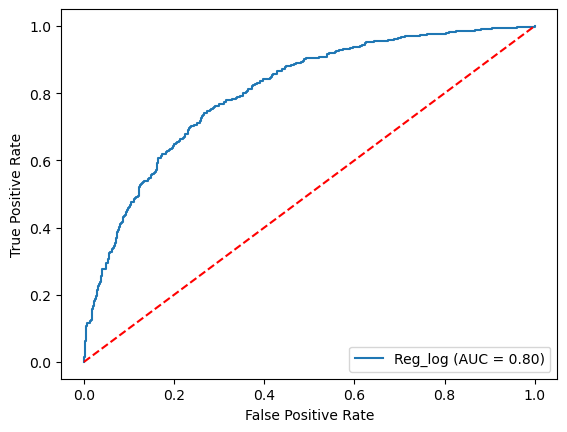

In [48]:
#Realizamos el gráfico de la Curva ROC
auc = roc_auc_score(y_test, y_test_log_score)
fpr, tpr, thresholds = roc_curve(y_test, y_test_log_score)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [49]:
#Calculamos AUC e imprimimos
auc = roc_auc_score(y_test, y_test_log_score)
print('AUC: %.4f' % auc)

AUC: 0.8047


In [50]:
#Calculamos Accuracy e imprimimos
accuracy = accuracy_score(y_test, y_test_log)
print('Accuracy: %f' % accuracy)

Accuracy: 0.747209


##### Análisis de discriminante lineal

In [51]:
#Estimamos el modelo de discriminante lineal
lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(Xm_train, y_train)

In [52]:
#Calculamos las probabilidades de ser pobre y las clasificaciones predichas por el modelo
y_test_lda_score = lda.predict_proba(Xm_test)[:,1]
y_test_lda = lda.predict(Xm_test)

In [53]:
#Nuevamente realizamos la matriz de confusión y su impresión más clara

matriz_confusion = confusion_matrix(y_test, y_test_lda)
print('Confusion Matrix:')
print(matriz_confusion) 

tn, fp , fn, tp = confusion_matrix(y_test, y_test_lda).ravel()

print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Confusion Matrix:
[[632 150]
 [180 292]]
Verdadero 0:  632
Falso 1:  150
Falso 0:  180
Verdadero 1:  292


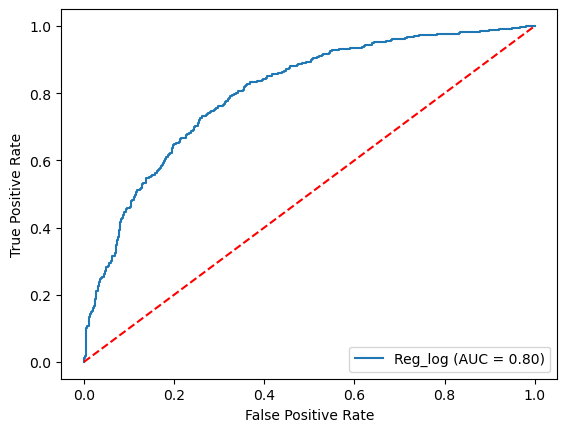

In [54]:
#Graficamos Curva ROC
auc = roc_auc_score(y_test, y_test_lda_score)
fpr, tpr, thresholds = roc_curve(y_test, y_test_lda_score)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [55]:
#Calculamos AUC
auc = roc_auc_score(y_test, y_test_lda_score)
print('AUC: %.4f' % auc)

AUC: 0.8024


In [56]:
#Calculamos Accuracy
accuracy = accuracy_score(y_test, y_test_lda)
print('Accuracy: %f' % accuracy)

Accuracy: 0.736842


##### KNN con k = 3

In [57]:
#Estimamos el modelo de vecinos cercanos con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(Xm_train, y_train)

In [58]:
#Calculamos las probabilidades y valores de pobreza predichos
y_test_knn_score = knn.predict_proba(Xm_test)[:,1]
y_test_knn = knn.predict(Xm_test)

In [59]:
#Realizamos la matriz de confusión e imprimimos los resultados

matriz_confusion = confusion_matrix(y_test, y_test_knn)
print('Confusion Matrix:')
print(matriz_confusion) 

tn, fp , fn, tp = confusion_matrix(y_test, y_test_knn).ravel()  
print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Confusion Matrix:
[[583 199]
 [235 237]]
Verdadero 0:  583
Falso 1:  199
Falso 0:  235
Verdadero 1:  237


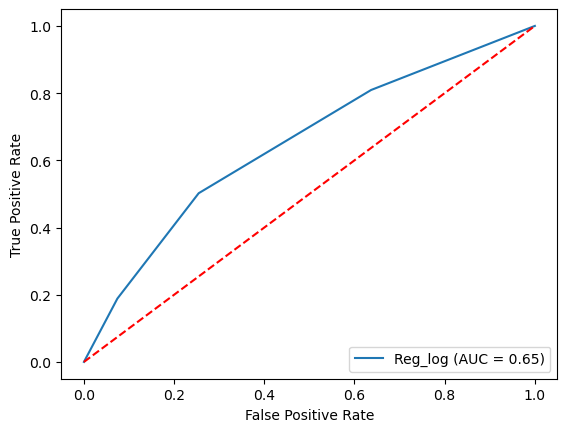

In [60]:
#Graficamos la Curva ROC
auc = roc_auc_score(y_test, y_test_knn_score)
fpr, tpr, thresholds = roc_curve(y_test, y_test_knn_score)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [61]:
#Calculamos AUC
auc = roc_auc_score(y_test, y_test_knn_score)
print('AUC: %.4f' % auc)

AUC: 0.6485


In [62]:
#Calculamos Accuracy
accuracy = accuracy_score(y_test, y_test_knn)
print('Accuracy: %f' % accuracy)

Accuracy: 0.653907


##### Ejercicio 5

In [63]:
#Ajustamos la base de los que no respondieron, quedandonos con los mismos predictores que utilizamos para poder estimar el modelo
norespondieron_aj = norespondieron.drop([ "CODUSU", "IMPUTA", "CH16_COD", "CH15_COD","MAS_500", "CH05", "PP09A_ESP", "PP11M",
                        "PP11N", "PP11O", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T", "PP11B2_DIA", "PP11C", "PP11C99", 
                        "PP11D_COD", "PP11G_ANO", "PP11G_MES", "PP11G_DIA", "PP11L", "PP11L1", "PP10A", "PP10C", "PP10D",
                        "PP10E", "PP11A", "PP11B_COD", "PP11B1", "PP11B2_MES", "PP11B2_ANO", "PP09C_ESP",
                       "PP07G4", "PP07G_59", "PP07H","PP07I","PP07J","PP07K","PP09A","PP09B","PP09C",
                       "PP07E", "PP07F1", "PP07F2", "PP07F3", "PP07F4","PP07F5","PP07G1","PP07G2","PP07G3",
                       "PP05H","PP06A","PP06C","PP06D","PP06E","PP06H","PP07A","PP07C","PP07D",
                       "PP04G","PP05B2_MES","PP05B2_ANO","PP05B2_DIA","PP05C_1","PP05C_2","PP05C_3","PP05E","PP05F",
                       "PP04B_COD","PP04B1","PP04B2","PP04B3_MES","PP04B3_ANO","PP04B3_DIA","PP04C","PP04C99","PP04D_COD",
                       "PP03D","PP3E_TOT","PP3F_TOT","PP03G","PP03H","PP03I","PP03J","INTENSI","PP04A","PP03C", "CH14", "PP02C7",
                       "PP02C1","PP02C3","PP02C4","PP02C5","PP02C6","PP02C8","PP02I"], axis=1)


In [64]:
#Calculamos las probababilidades y clasificaciones de pobreza para cada uno de los individuos que no habían respondido ITF
#Nos quedamos con el modelo logístico ya que tiene mayor ACU, mayor ACCURACY, mayor cantidad de Verdaderos Positivos y Negativos y menor cantidad de Falsos Positivos y Negativos
prob_pobres_norespondieron = log_reg.predict_proba(norespondieron_aj)[:,1]
pobres_norespondieron = log_reg.predict(norespondieron_aj)
proporcion_pobres = sum(pobres_norespondieron)/len(pobres_norespondieron)
print("Proporción de pobres: ", proporcion_pobres)

Proporción de pobres:  0.5133185349611543


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [65]:
#Total de personas pobres
sum(pobres_norespondieron)

925

#### Ejercicio 6

In [66]:
#Retomamos los predictores utilizamos en el ejercicio 3
y = respondieron["pobre"] 
Xm = respondieron.drop(["pobre", "CODUSU", "IMPUTA", "CH16_COD", "CH15_COD","MAS_500", "CH05", "PP09A_ESP", "PP11M",
                        "PP11N", "PP11O", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T", "PP11B2_DIA", "PP11C", "PP11C99", 
                        "PP11D_COD", "PP11G_ANO", "PP11G_MES", "PP11G_DIA", "PP11L", "PP11L1", "PP10A", "PP10C", "PP10D",
                        "PP10E", "PP11A", "PP11B_COD", "PP11B1", "PP11B2_MES", "PP11B2_ANO", "PP09C_ESP",
                       "PP07G4", "PP07G_59", "PP07H","PP07I","PP07J","PP07K","PP09A","PP09B","PP09C",
                       "PP07E", "PP07F1", "PP07F2", "PP07F3", "PP07F4","PP07F5","PP07G1","PP07G2","PP07G3",
                       "PP05H","PP06A","PP06C","PP06D","PP06E","PP06H","PP07A","PP07C","PP07D",
                       "PP04G","PP05B2_MES","PP05B2_ANO","PP05B2_DIA","PP05C_1","PP05C_2","PP05C_3","PP05E","PP05F",
                       "PP04B_COD","PP04B1","PP04B2","PP04B3_MES","PP04B3_ANO","PP04B3_DIA","PP04C","PP04C99","PP04D_COD",
                       "PP03D","PP3E_TOT","PP3F_TOT","PP03G","PP03H","PP03I","PP03J","INTENSI","PP04A","PP03C", "CH14", "PP02C7",
                       "PP02C1","PP02C3","PP02C4","PP02C5","PP02C6","PP02C8","PP02I"], axis=1)
#Observamos sus columnas
Xm.columns

Index(['ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION',
       'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09',
       'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO',
       'CAT_OCUP', 'CAT_INAC', 'PP02C2', 'PP02E', 'PP02H', 'sexo_edad'],
      dtype='object')

In [67]:
#Eliminamos columnas poco relevantes a nuestro juicio que suman ruido a la estimación y no aportan cuestiones significativas
Xm_aj = Xm.drop(['ANO4', 'NRO_HOGAR', 'TRIMESTRE', 'COMPONENTE', 
                 'H15','PONDERA', 'REGION','CH03'], axis=1)

#Visualizamos los predictores remanentes
Xm_aj.columns

Index(['AGLOMERADO', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11',
       'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP',
       'CAT_INAC', 'PP02C2', 'PP02E', 'PP02H', 'sexo_edad'],
      dtype='object')

In [68]:
#Agregamos la constante y separamos la muestra entre testeo y entrenamiento
Xm_aj = sm.add_constant(Xm_aj)
Xm_aj, y = np.array(Xm_aj), np.array(y)

Xm_aj_train, Xm_aj_test, y_train, y_test = train_test_split(Xm_aj, y, test_size=0.3, random_state=201)

In [69]:
#Volvemos a estimar el modelo logístico con los nuevos predictores
log_reg_aj = LogisticRegression(max_iter=3000).fit(Xm_aj_train, y_train)

In [70]:
#Calculamos los valores predichos de pobreza y la probabilidad de pertenecer a cada categoría
y_test_log_score_aj = log_reg_aj.predict_proba(Xm_aj_test)[:,1]
y_test_log_aj = log_reg_aj.predict(Xm_aj_test)

In [71]:
#Graficamos la matriz de confusión e imprimimos de forma clara

matriz_confusion = confusion_matrix(y_test, y_test_log_aj)
print('Confusion Matrix:')
print(matriz_confusion) 

tn, fp , fn, tp = confusion_matrix(y_test, y_test_log_aj).ravel() 

print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Confusion Matrix:
[[633 149]
 [178 294]]
Verdadero 0:  633
Falso 1:  149
Falso 0:  178
Verdadero 1:  294


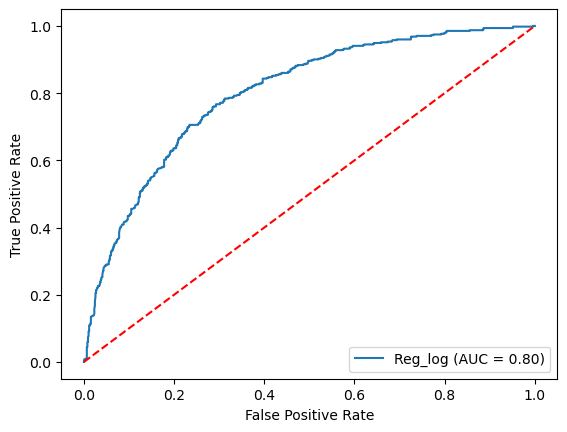

In [72]:
#Graficamos la curva ROC
auc = roc_auc_score(y_test, y_test_log_score_aj)
fpr, tpr, thresholds = roc_curve(y_test, y_test_log_score_aj)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [73]:
#Calculamos AUC
auc = roc_auc_score(y_test,y_test_log_score_aj)
print('AUC: %.4f' % auc)

AUC: 0.8007


In [74]:
#Calculamos Accuracy
accuracy = accuracy_score(y_test, y_test_log_aj)
print('Accuracy: %f' % accuracy)

Accuracy: 0.739234


In [75]:
#INTENTO
norespondieron_aj = norespondieron.drop([ "CODUSU", "IMPUTA", "CH16_COD", "CH15_COD","MAS_500", "CH05", "PP09A_ESP", "PP11M",
                        "PP11N", "PP11O", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T", "PP11B2_DIA", "PP11C", "PP11C99", 
                        "PP11D_COD", "PP11G_ANO", "PP11G_MES", "PP11G_DIA", "PP11L", "PP11L1", "PP10A", "PP10C", "PP10D",
                        "PP10E", "PP11A", "PP11B_COD", "PP11B1", "PP11B2_MES", "PP11B2_ANO", "PP09C_ESP",
                       "PP07G4", "PP07G_59", "PP07H","PP07I","PP07J","PP07K","PP09A","PP09B","PP09C",
                       "PP07E", "PP07F1", "PP07F2", "PP07F3", "PP07F4","PP07F5","PP07G1","PP07G2","PP07G3",
                       "PP05H","PP06A","PP06C","PP06D","PP06E","PP06H","PP07A","PP07C","PP07D",
                       "PP04G","PP05B2_MES","PP05B2_ANO","PP05B2_DIA","PP05C_1","PP05C_2","PP05C_3","PP05E","PP05F",
                       "PP04B_COD","PP04B1","PP04B2","PP04B3_MES","PP04B3_ANO","PP04B3_DIA","PP04C","PP04C99","PP04D_COD",
                       "PP03D","PP3E_TOT","PP3F_TOT","PP03G","PP03H","PP03I","PP03J","INTENSI","PP04A","PP03C", "CH14", "PP02C7",
                       "PP02C1","PP02C3","PP02C4","PP02C5","PP02C6","PP02C8","PP02I"], axis=1)

#Ajustamos la base de los que no respondieron, quedandonos con los mismos predictores que utilizamos para poder estimar el modelo
norespondieron_aj2 = norespondieron_aj.drop(['ANO4', 'NRO_HOGAR', 'TRIMESTRE', 'COMPONENTE', 
                                             'H15','PONDERA', 'REGION','CH03'], axis=1)
norespondieron_aj2 = sm.add_constant(norespondieron_aj2)

In [76]:
#Calculamos las probababilidades y clasificaciones de pobreza para cada uno de los individuos que no habían respondido ITF
#Nos quedamos con el modelo logístico ya que tiene mayor ACU, mayor ACCURACY, mayor cantidad de Verdaderos Positivos y Negativos y menor cantidad de Falsos Positivos y Negativos
prob_pobres_norespondieron2 = log_reg_aj.predict_proba(norespondieron_aj2)[:,1]
pobres_norespondieron2 = log_reg_aj.predict(norespondieron_aj2)
proporcion_pobres2 = sum(pobres_norespondieron2)/len(pobres_norespondieron2)
print("Proporción de pobres: ", proporcion_pobres2)

Proporción de pobres:  0.5221975582685905


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
